In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image as im

In [2]:
#Connect to Twitter
APP_KEY = '1IdPmbjVIYRo2zsvXSZOBivdd'
APP_SECRET = 'FDzoBQTDWfMhlGWBxgz0Hsj8cw0E09ALVGRtfXUV1o0aSxuXYz'
twitter = Twython(APP_KEY, APP_SECRET)

In [3]:
#Get timeline 

## Collect tweets from the president throughout the year
user_timeline=twitter.get_user_timeline(screen_name='realDonaldTrump',count=1) #screen_name is twitter handle

In [4]:
#get most recent id

#has had 1600 tweets since the beginning of the year
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='realDonaldTrump',count=1600, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [5]:
user_timeline[0:10]

[{'created_at': 'Thu May 21 00:13:01 +0000 2020',
  'id': 1263261477575819267,
  'id_str': '1263261477575819267',
  'text': '....Together, we built the greatest economy in history. We will do it again – better than ever before!',
  'truncated': False,
  'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': 1263261476774699008,
  'in_reply_to_status_id_str': '1263261476774699008',
  'in_reply_to_user_id': 25073877,
  'in_reply_to_user_id_str': '25073877',
  'in_reply_to_screen_name': 'realDonaldTrump',
  'user': {'id': 25073877,
   'id_str': '25073877',
   'name': 'Donald J. Trump',
   'screen_name': 'realDonaldTrump',
   'location': 'Washington, DC',
   'description': '45th President of the United States of America🇺🇸',
   'url': 'https://t.co/OMxB0x7xC5',
   'entities': {'url': {'urls': [{'url': 'https://t.co/OMxB0x7xC5',
       'expanded_

In [6]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [7]:
raw_tweets #toggle with o to close or open output on screen

['....Together, we built the greatest economy in history. We will do it again – better than ever before!',
 'Great call with thousands of our Hispanic community, business, and faith leaders today. During this national trial,… https://t.co/Is4CUVmlFK',
 'https://t.co/tE21sk7MR3',
 'https://t.co/l4StnpkZop',
 'Michigan sends absentee ballot applications to 7.7 million people ahead of Primaries and the General Election. This… https://t.co/O2Y8dXRvmd',
 '....beaten Sleepy Joe in a LANDSLIDE, every State, if these events didn’t happen. Even if Warren just dropped out,… https://t.co/Qj2Le6SvC7',
 'Crazy Bernie Sanders is not a fighter. He gives up too easy! The Dem establishment gets Alfred E. Newman (Mayor Pet… https://t.co/NnGFQGRgMA',
 'Congratulations to my daughter, Tiffany, on graduating from Georgetown Law. Great student, great school. Just what… https://t.co/BLNKYQnUkV',
 'The Tulsa, Oklahoma area has been approved for a transportation loan from the @USDOT of up to $120M to help expa

In [8]:
#Clean the data by removing URL links, special characters, emojis, and extra white spaces.

raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [9]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, any smaller words ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS] #from a built in list of stopwords

In [10]:
words

['together',
 'built',
 'greatest',
 'economy',
 'history',
 'will',
 'better',
 'beforegreat',
 'call',
 'thousands',
 'hispanic',
 'community',
 'business',
 'faith',
 'leaders',
 'today',
 'national',
 'trial',
 'sends',
 'absentee',
 'ballot',
 'applications',
 'million',
 'people',
 'ahead',
 'primaries',
 'general',
 'election',
 'sleepy',
 'joe',
 'landslide',
 'every',
 'state',
 'events',
 'didnt',
 'happen',
 'even',
 'warren',
 'dropped',
 'bernie',
 'sanders',
 'fighter',
 'gives',
 'easy',
 'dem',
 'establishment',
 'gets',
 'alfred',
 'newman',
 'mayor',
 'pet',
 'daughter',
 'tiffany',
 'graduating',
 'georgetown',
 'law',
 'great',
 'student',
 'great',
 'school',
 'tulsa',
 'oklahoma',
 'area',
 'approved',
 'transportation',
 'loan',
 'usdot',
 'help',
 'expand',
 'sent',
 'best',
 'military',
 'amp',
 'fema',
 'teams',
 'already',
 'governor',
 'must',
 'now',
 'set',
 'free',
 'help',
 'will',
 'news',
 'dallas',
 'area',
 'dallas',
 'area',
 'rapid',
 'transit',
 '

In [11]:
logo = np.array(Image.open('Datasets/10wmt-superJumbo-v4.jpg'))

In [12]:
wc = WordCloud(background_color="white", max_words=100, mask=logo)
clean_string = ','.join(words)
wc.generate(clean_string)

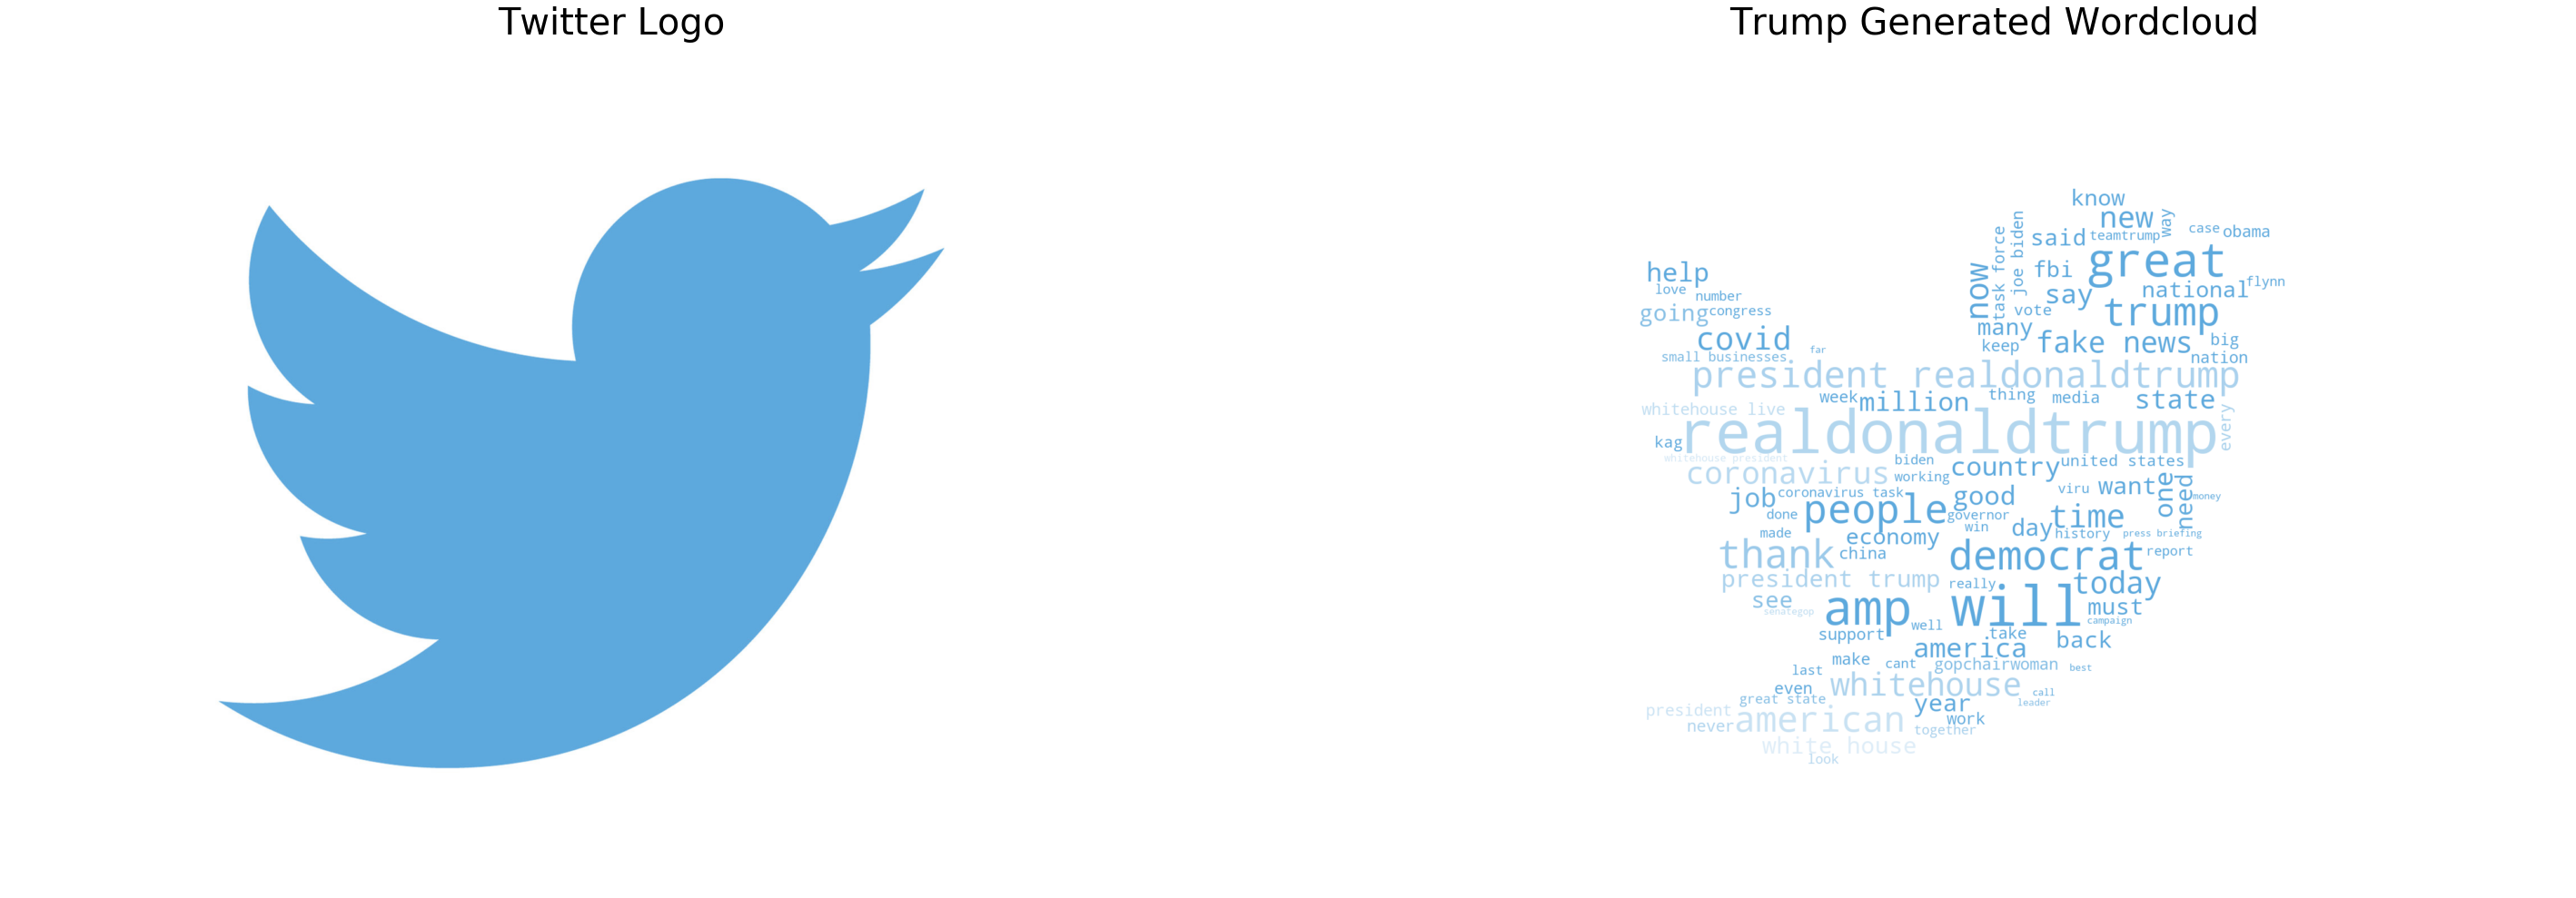

In [15]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(logo, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Twitter Logo', size=40)
plt.axis("off")

image_colors_1 = ImageColorGenerator(logo)

f.add_subplot(1,2, 2)
plt.imshow(wc.recolor(color_func=image_colors_1), interpolation='bilinear')
plt.title('Trump Generated Wordcloud', size=40)
plt.axis("off")

plt.savefig("Visualizations/Trump_Most_100_Used_Words_On_Twitter")
plt.show()

In [ ]:
#Make one more wordcloud using top 500 words in shape of Capitol Building

#Make bar chart of top 50 words 

#kinda surprised Lamestream media isnt in the top 100 


In [29]:
seal = np.array(Image.open('Datasets/81DpN-lrJvL._SL1350.jpg'))

wc_seal = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=seal)
clean_string = ','.join(words)
wc_seal.generate(clean_string)


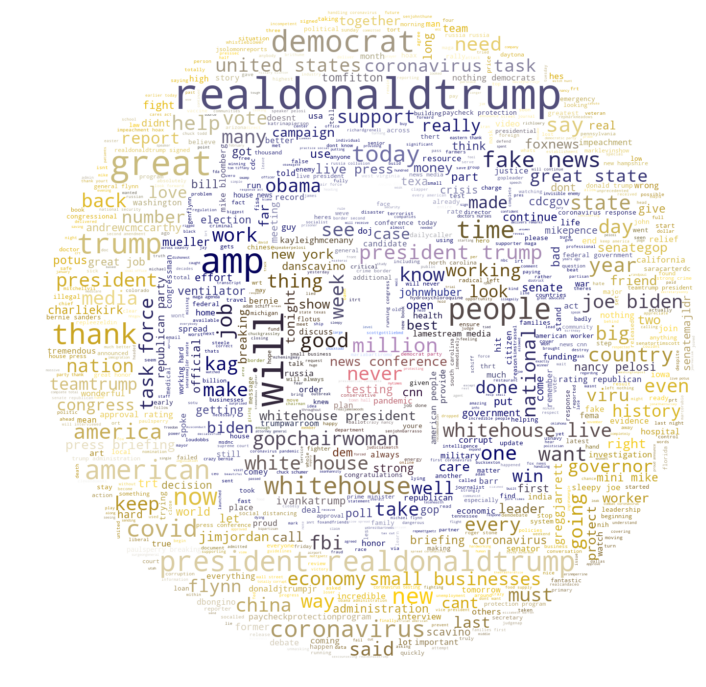

In [31]:
# create coloring from image
image_colors = ImageColorGenerator(seal)
plt.figure(figsize=[12,12])
plt.imshow(wc_seal.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("Visualizations/Presidential_Seal_1000_Most_Common_Words_from_Trump_Twitter_Account")
plt.show()

In [22]:
# Top 50 Words
best_words = [word for word in words]
counted_words = collections.Counter(best_words)

words_list = []
counts = []
for letter, count in counted_words.most_common(50):
    words_list.append(letter)
    counts.append(count)

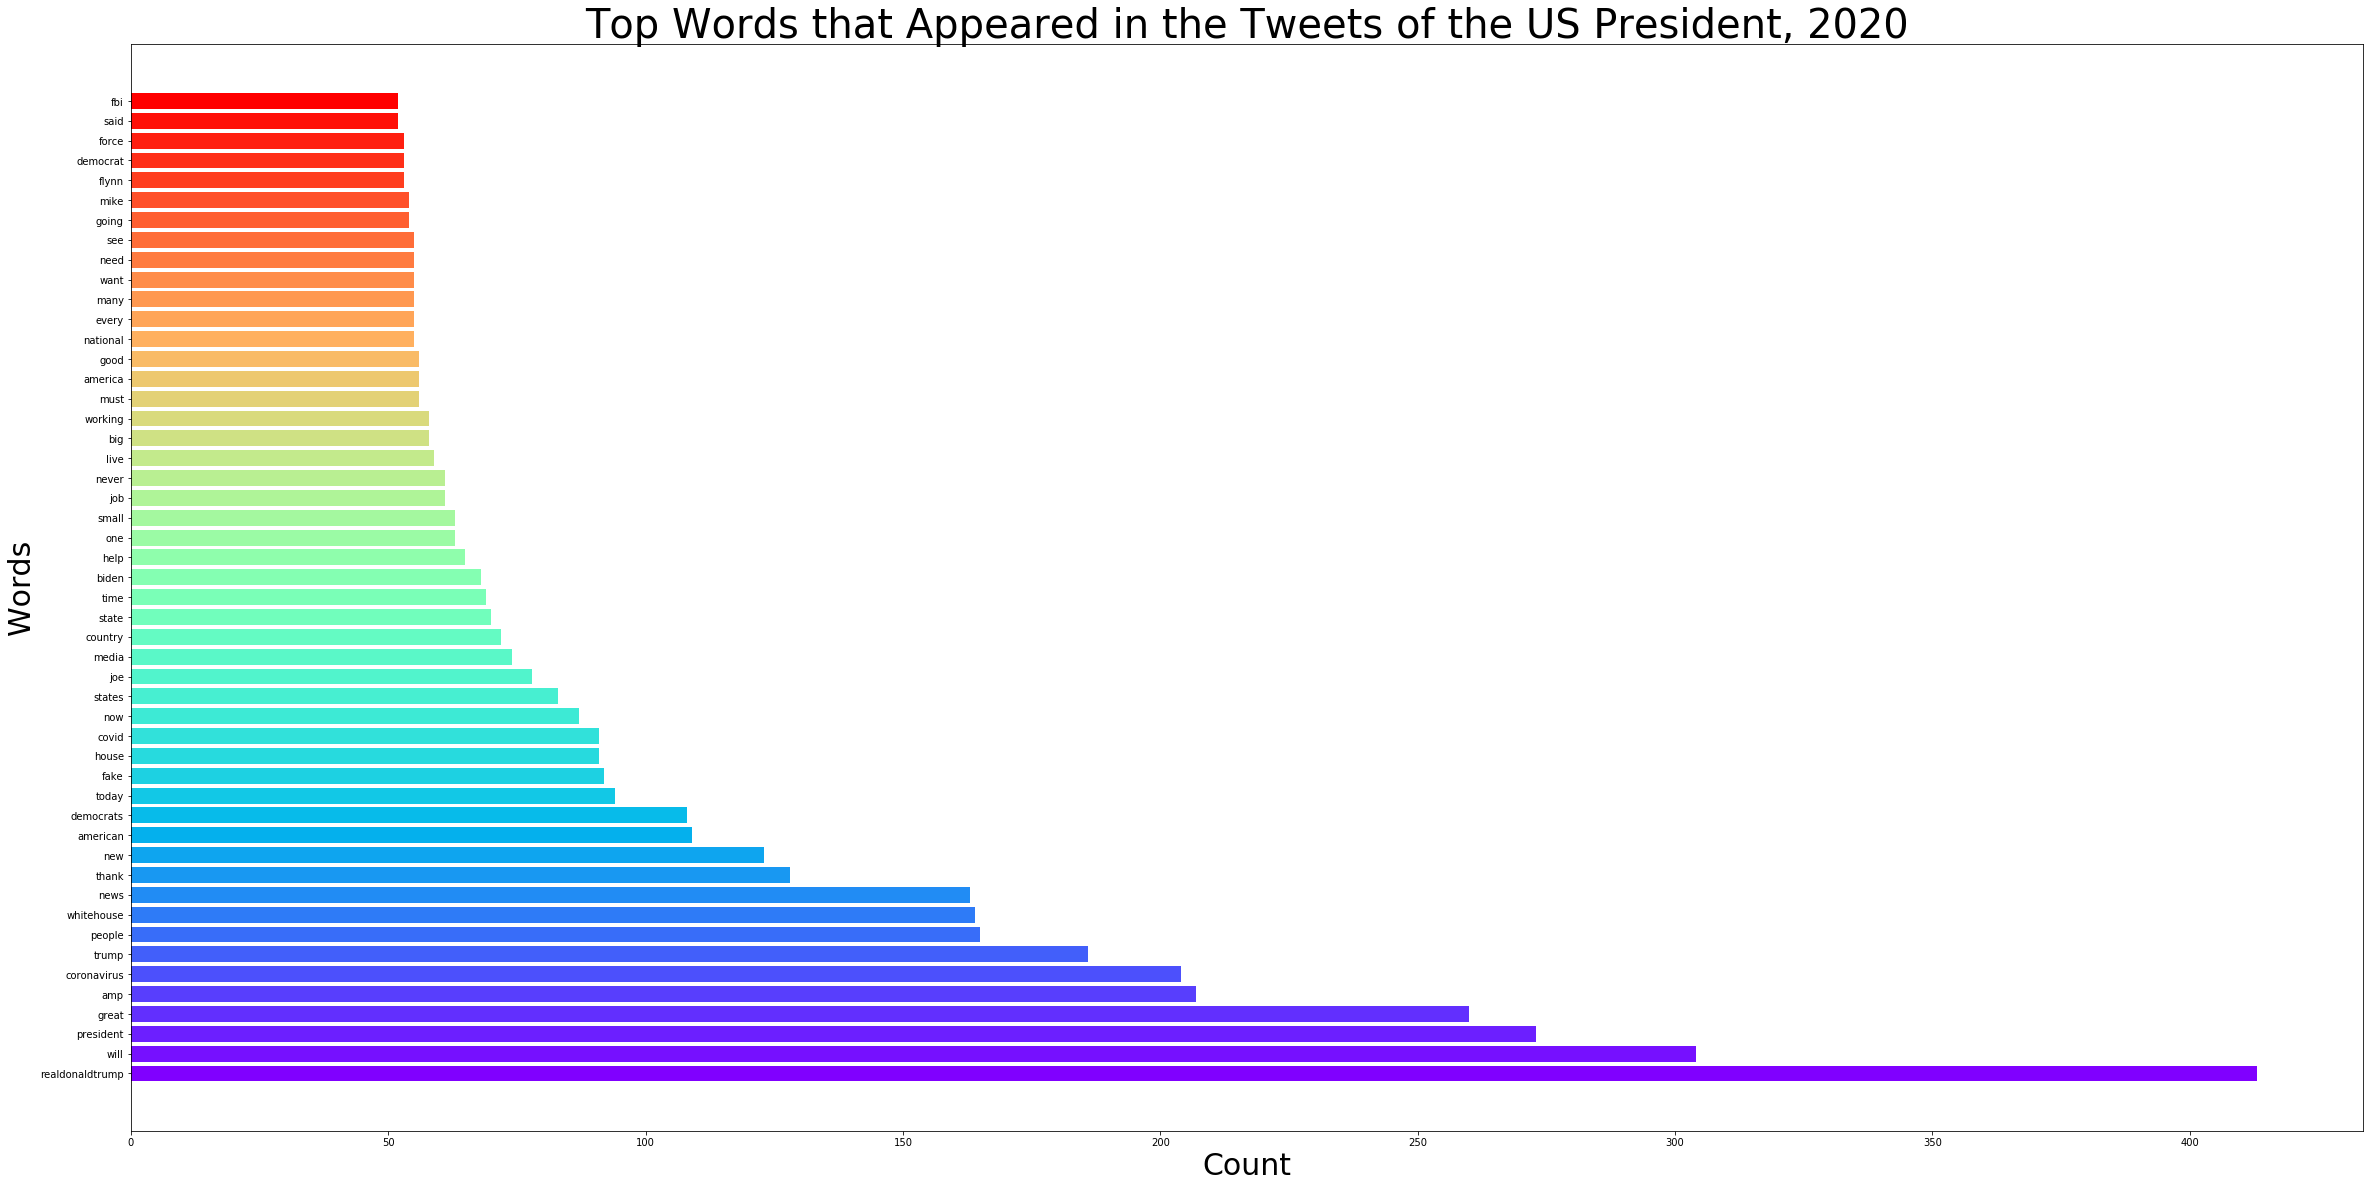

In [37]:
colors = cm.rainbow(np.linspace(0, 1, 50))


plt.figure(figsize=(40,20))
plt.title('Top Words that Appeared in the Tweets of the US President, 2020', fontsize = 40)
plt.xlabel('Count', size = 30)
plt.ylabel('Words', size = 30)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.barh(words_list, counts, color=colors)

plt.show()